In [252]:
import numpy as np

from numpy.random import default_rng
from scipy.stats import poisson, gamma, nbinom

import matplotlib.pyplot as plt

rng = default_rng()

### The Model (a Poisson Process)

In [253]:
lambda_true = 4.0

In [254]:
x = np.arange(0,poisson.ppf(0.999,lambda_true))

<BarContainer object of 11 artists>

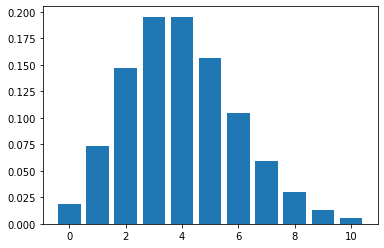

In [255]:
plt.bar(x,poisson.pmf(x, lambda_true))

### Conjugate Prior for Lambda (Gamma Distribution)

In [256]:
a = 2
b = 0.5

In [257]:
x_l = np.linspace(0,gamma.ppf(0.99, a,scale=1/b), 100)

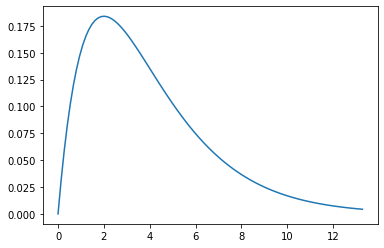

In [258]:
plt.plot(x_l,gamma.pdf(x_l,a,scale=1/b))

### Posterior for Lambda

In [305]:
n_sample = 2

In [306]:
k = rng.poisson(lambda_true,size=n_sample)

In [307]:
a_posterior = a + np.sum(k)
b_posterior = b + len(k)

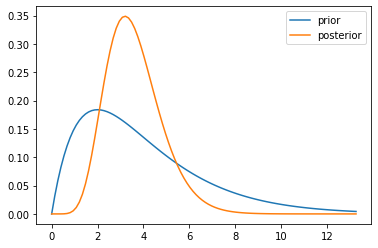

In [308]:
plt.plot(x_l,gamma.pdf(x_l,a,scale=1/b),label='prior')
plt.plot(x_l,gamma.pdf(x_l,a_posterior,scale=1/b_posterior),label='posterior')
plt.legend()

### Posterior predictive

In [309]:
r_pp = a_posterior
p_pp = 1/(1+b_posterior)


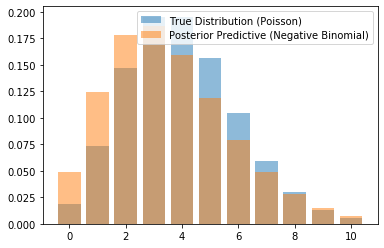

In [310]:
plt.bar(x,poisson.pmf(x, lambda_true),alpha=0.5,label='True Distribution (Poisson)')
plt.bar(x,nbinom.pmf(x, r_pp,1-p_pp),alpha=0.5,label='Posterior Predictive (Negative Binomial)')

plt.legend();

### Comparison of model paramters

In [311]:
lambda_true

4.0

In [312]:
l_MLE = np.mean(k)
l_MLE

3.5

In [313]:
l_Prior = (a)/(b) #Average from Prior
l_Prior

4.0

In [314]:
l_MAP = (a_posterior)/(b_posterior)
l_MAP

3.6

In [315]:
l_pp = (r_pp*p_pp)/(1-p_pp)
l_pp 

3.5999999999999996